In [9]:
import numpy as np
import grid_world_class as gw
import riverswim_class as rs 
import riverswim_class_smdp as rs_s 

import UCRL2_L as ucrl
import UCRL_SMDP as ucrlS
import e_greedy as egreed  
import experiment_utils as utils
import importlib
importlib.reload(gw)
importlib.reload(rs)
importlib.reload(rs_s)
importlib.reload(ucrl)
importlib.reload(ucrlS)
importlib.reload(egreed)
importlib.reload(utils)
import matplotlib.pyplot as plt

GridWorld

In [2]:
# Npte we use input deltas such that the statements hold with probability delta=0.05

env_smdp = gw.grid_world(nS=36, T_max=4)
env_ucrl = gw.grid_world(nS=36, T_max=1)
ucrl_naive = ucrl.UCRL2(nS=36, nA = 4, delta = 0.05)
smdp_ucrl = ucrlS.UCRL_SMDP(nS = 36, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=0)
# propose new confidence sets.
smdp_ucrl_l = ucrlS.UCRL_SMDP(nS = 36, nA = 4, delta = 0.05/6, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=1)
# propose new Brunskill-confidence sets.
smdp_ucrl_b = ucrlS.UCRL_SMDP(nS = 36, nA = 4, delta = 0.05/6, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=2)

Bus_ucrl = ucrlS.BUS(nS = 36, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max_grid = np.array([2,4,6]),imprv=0)
Bus2_ucrl = ucrlS.BUS2(nS = 36, nA = 4, delta = 0.05, b_r=1,b_tau=1,r_max=1,tau_min=1, T_max_grid = np.array([2,4,6]),imprv=0)
Bus3_ucrl = ucrlS.BUS2(nS = 36, nA = 4, delta = 0.05, b_r=1,b_tau=1,r_max=1,tau_min=1, T_max_grid = np.array([2,4,6]),imprv=0)


_,_,_,gstar = utils.VI(env_ucrl)
print(smdp_ucrl.b_r)

1


In [3]:
reward_ucrl,tau_ucrl = utils.run_experiment(env_ucrl, ucrl_naive, T = 10**7)
reward_sucrl,tau_sucrl = utils.run_experiment(env_smdp, smdp_ucrl, T = 10**7)
reward_sucrl_l,tau_sucrl_l = utils.run_experiment(env_smdp, smdp_ucrl_l, T = 10**7)
reward_sucrl_b,tau_sucrl_b = utils.run_experiment(env_smdp, smdp_ucrl_b, T = 10**7)

In [4]:
reward_bus,tau_bus = utils.run_experiment(env_smdp, Bus_ucrl, T = 10**7)

reward_bus2,tau_bus2 = utils.run_experiment(env_smdp, Bus2_ucrl, T = 10**7)


In [62]:
print(np.mean(reward_sucrl),
np.mean(reward_ucrl),
np.mean(reward_bus),
np.mean(reward_bus2)
)

0.0747947 0.0621205 0.0829381 0.0493922


In [5]:
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)
regret_sucrl = utils.calc_regret(reward=reward_sucrl, tau = tau_sucrl, optimal_gain=gstar)
regret_sucrl_l = utils.calc_regret(reward=reward_sucrl_l, tau = tau_sucrl_l, optimal_gain=gstar)
regret_sucrl_b = utils.calc_regret(reward=reward_sucrl_b, tau = tau_sucrl_b, optimal_gain=gstar)




In [6]:
regrets_bus = utils.calc_regret(reward=reward_bus, tau = tau_bus, optimal_gain=gstar)
regrets_bus2 = utils.calc_regret(reward=reward_bus2, tau = tau_bus2, optimal_gain=gstar)

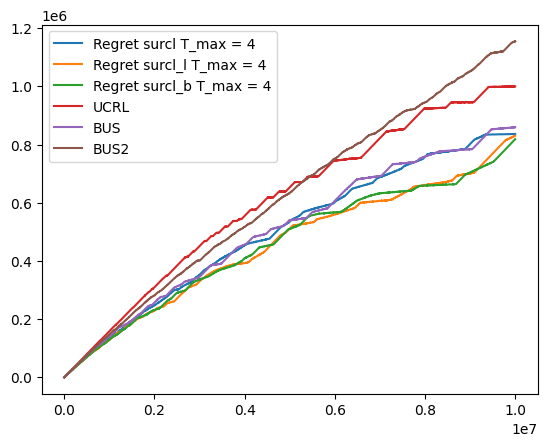

In [7]:
plt.plot(regret_sucrl, label = "Regret surcl T_max = 4")
plt.plot(regret_sucrl_l, label = "Regret surcl_l T_max = 4")
plt.plot(regret_sucrl_b, label = "Regret surcl_b T_max = 4")



plt.plot(regret_ucrl, label = "UCRL")
plt.plot(regrets_bus, label = "BUS")

plt.plot(regrets_bus2, label = "BUS2")
plt.legend()

In [ ]:
print("Probs, BUS",Bus_ucrl.current_sample_prop , "Probs, BUS2", Bus2_ucrl.current_sample_prop)
Bus2_ucrl.loss_grid

Probs, BUS [0.35099818 0.34083562 0.3081662 ] Probs, BUS2 [0.63490793 0.34898728 0.01610479]


array([ 888.38818306,  918.98091513, 1076.22317094])

RiverSwim

In [18]:
env_smdp = rs.riverswim(nS=8, T_max=4)
env_ucrl = rs.riverswim(nS=8, T_max=1)
ucrl_naive = ucrl.UCRL2(nS=8, nA = 2, delta = 0.05)
smdp_ucrl = ucrlS.UCRL_SMDP(nS = 8, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=0)
# propose new confidence sets.
smdp_ucrl_l = ucrlS.UCRL_SMDP(nS = 8, nA = 2, delta = 0.05/6, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=1)
# propose new Brunskill-confidence sets.
smdp_ucrl_b = ucrlS.UCRL_SMDP(nS = 8, nA = 2, delta = 0.05/6, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=2)

Bus_ucrl = ucrlS.BUS(nS = 8, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max_grid = np.array([2,4,6]),imprv=0)
Bus2_ucrl = ucrlS.BUS2(nS = 8, nA = 2, delta = 0.05, b_r=1,b_tau=1,r_max=1,tau_min=1, T_max_grid = np.array([2,4,6]),imprv=0)
Bus3_ucrl = ucrlS.BUS3(nS = 8, nA = 2, delta = 0.05, b_r=1,b_tau=1,r_max=1,tau_min=1, T_max_grid = np.array([2,4,6]),imprv=0)

_,_,_,gstar = utils.VI(env_ucrl)



In [19]:
reward_ucrl,tau_ucrl = utils.run_experiment(env_ucrl, ucrl_naive, T = 10**6)
reward_sucrl,tau_sucrl = utils.run_experiment(env_smdp, smdp_ucrl, T = 10**6)
reward_sucrl_l,tau_sucrl_l = utils.run_experiment(env_smdp, smdp_ucrl_l, T = 10**6)
reward_sucrl_b,tau_sucrl_b = utils.run_experiment(env_smdp, smdp_ucrl_b, T = 10**6)


In [20]:
reward_bus,tau_bus = utils.run_experiment(env_smdp, Bus_ucrl, T = 10**6)
reward_bus2,tau_bus2 = utils.run_experiment(env_smdp, Bus2_ucrl, T = 10**6)


In [21]:
reward_bus3,tau_bus3 = utils.run_experiment(env_smdp, Bus3_ucrl, T = 10**6)


In [22]:
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)
regret_sucrl = utils.calc_regret(reward=reward_sucrl, tau = tau_sucrl, optimal_gain=gstar)
regret_sucrl_l = utils.calc_regret(reward=reward_sucrl_l, tau = tau_sucrl_l, optimal_gain=gstar)
regret_sucrl_b = utils.calc_regret(reward=reward_sucrl_b, tau = tau_sucrl_b, optimal_gain=gstar)

regrets_bus = utils.calc_regret(reward=reward_bus, tau = tau_bus, optimal_gain=gstar)
regrets_bus2 = utils.calc_regret(reward=reward_bus2, tau = tau_bus2, optimal_gain=gstar)
regrets_bus3 = utils.calc_regret(reward=reward_bus3, tau = tau_bus3, optimal_gain=gstar)


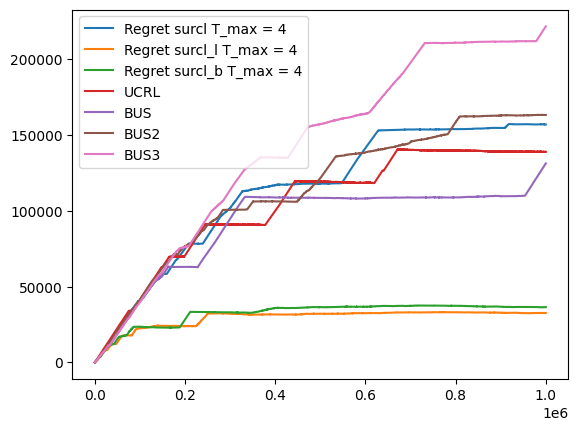

In [23]:
plt.plot(regret_sucrl, label = "Regret surcl T_max = 4")
plt.plot(regret_sucrl_l, label = "Regret surcl_l T_max = 4")
plt.plot(regret_sucrl_b, label = "Regret surcl_b T_max = 4")



plt.plot(regret_ucrl, label = "UCRL")
plt.plot(regrets_bus, label = "BUS")

plt.plot(regrets_bus2, label = "BUS2")
plt.plot(regrets_bus3, label = "BUS3")

plt.legend()

In [24]:
print("Probs, BUS",Bus_ucrl.current_sample_prop , "Probs, BUS2", Bus2_ucrl.current_sample_prop)
#Bus_ucrl.n_episodes
print(Bus_ucrl.loss_grid)
print(Bus3_ucrl.mu,Bus3_ucrl.Nk_bandit) # First is the mean, second is number of times each arm played (in episode sense).


Probs, BUS [0.41944144 0.23653342 0.34402514] Probs, BUS2 [0.35065023 0.35020328 0.29914649]
[60.25511792 69.18534546 63.34510885]
[0.02634572 0.04559371 0.25391126] [58. 65. 88.]
